### Hawaii - Kilauea earthquakes

In [2]:
import gmt

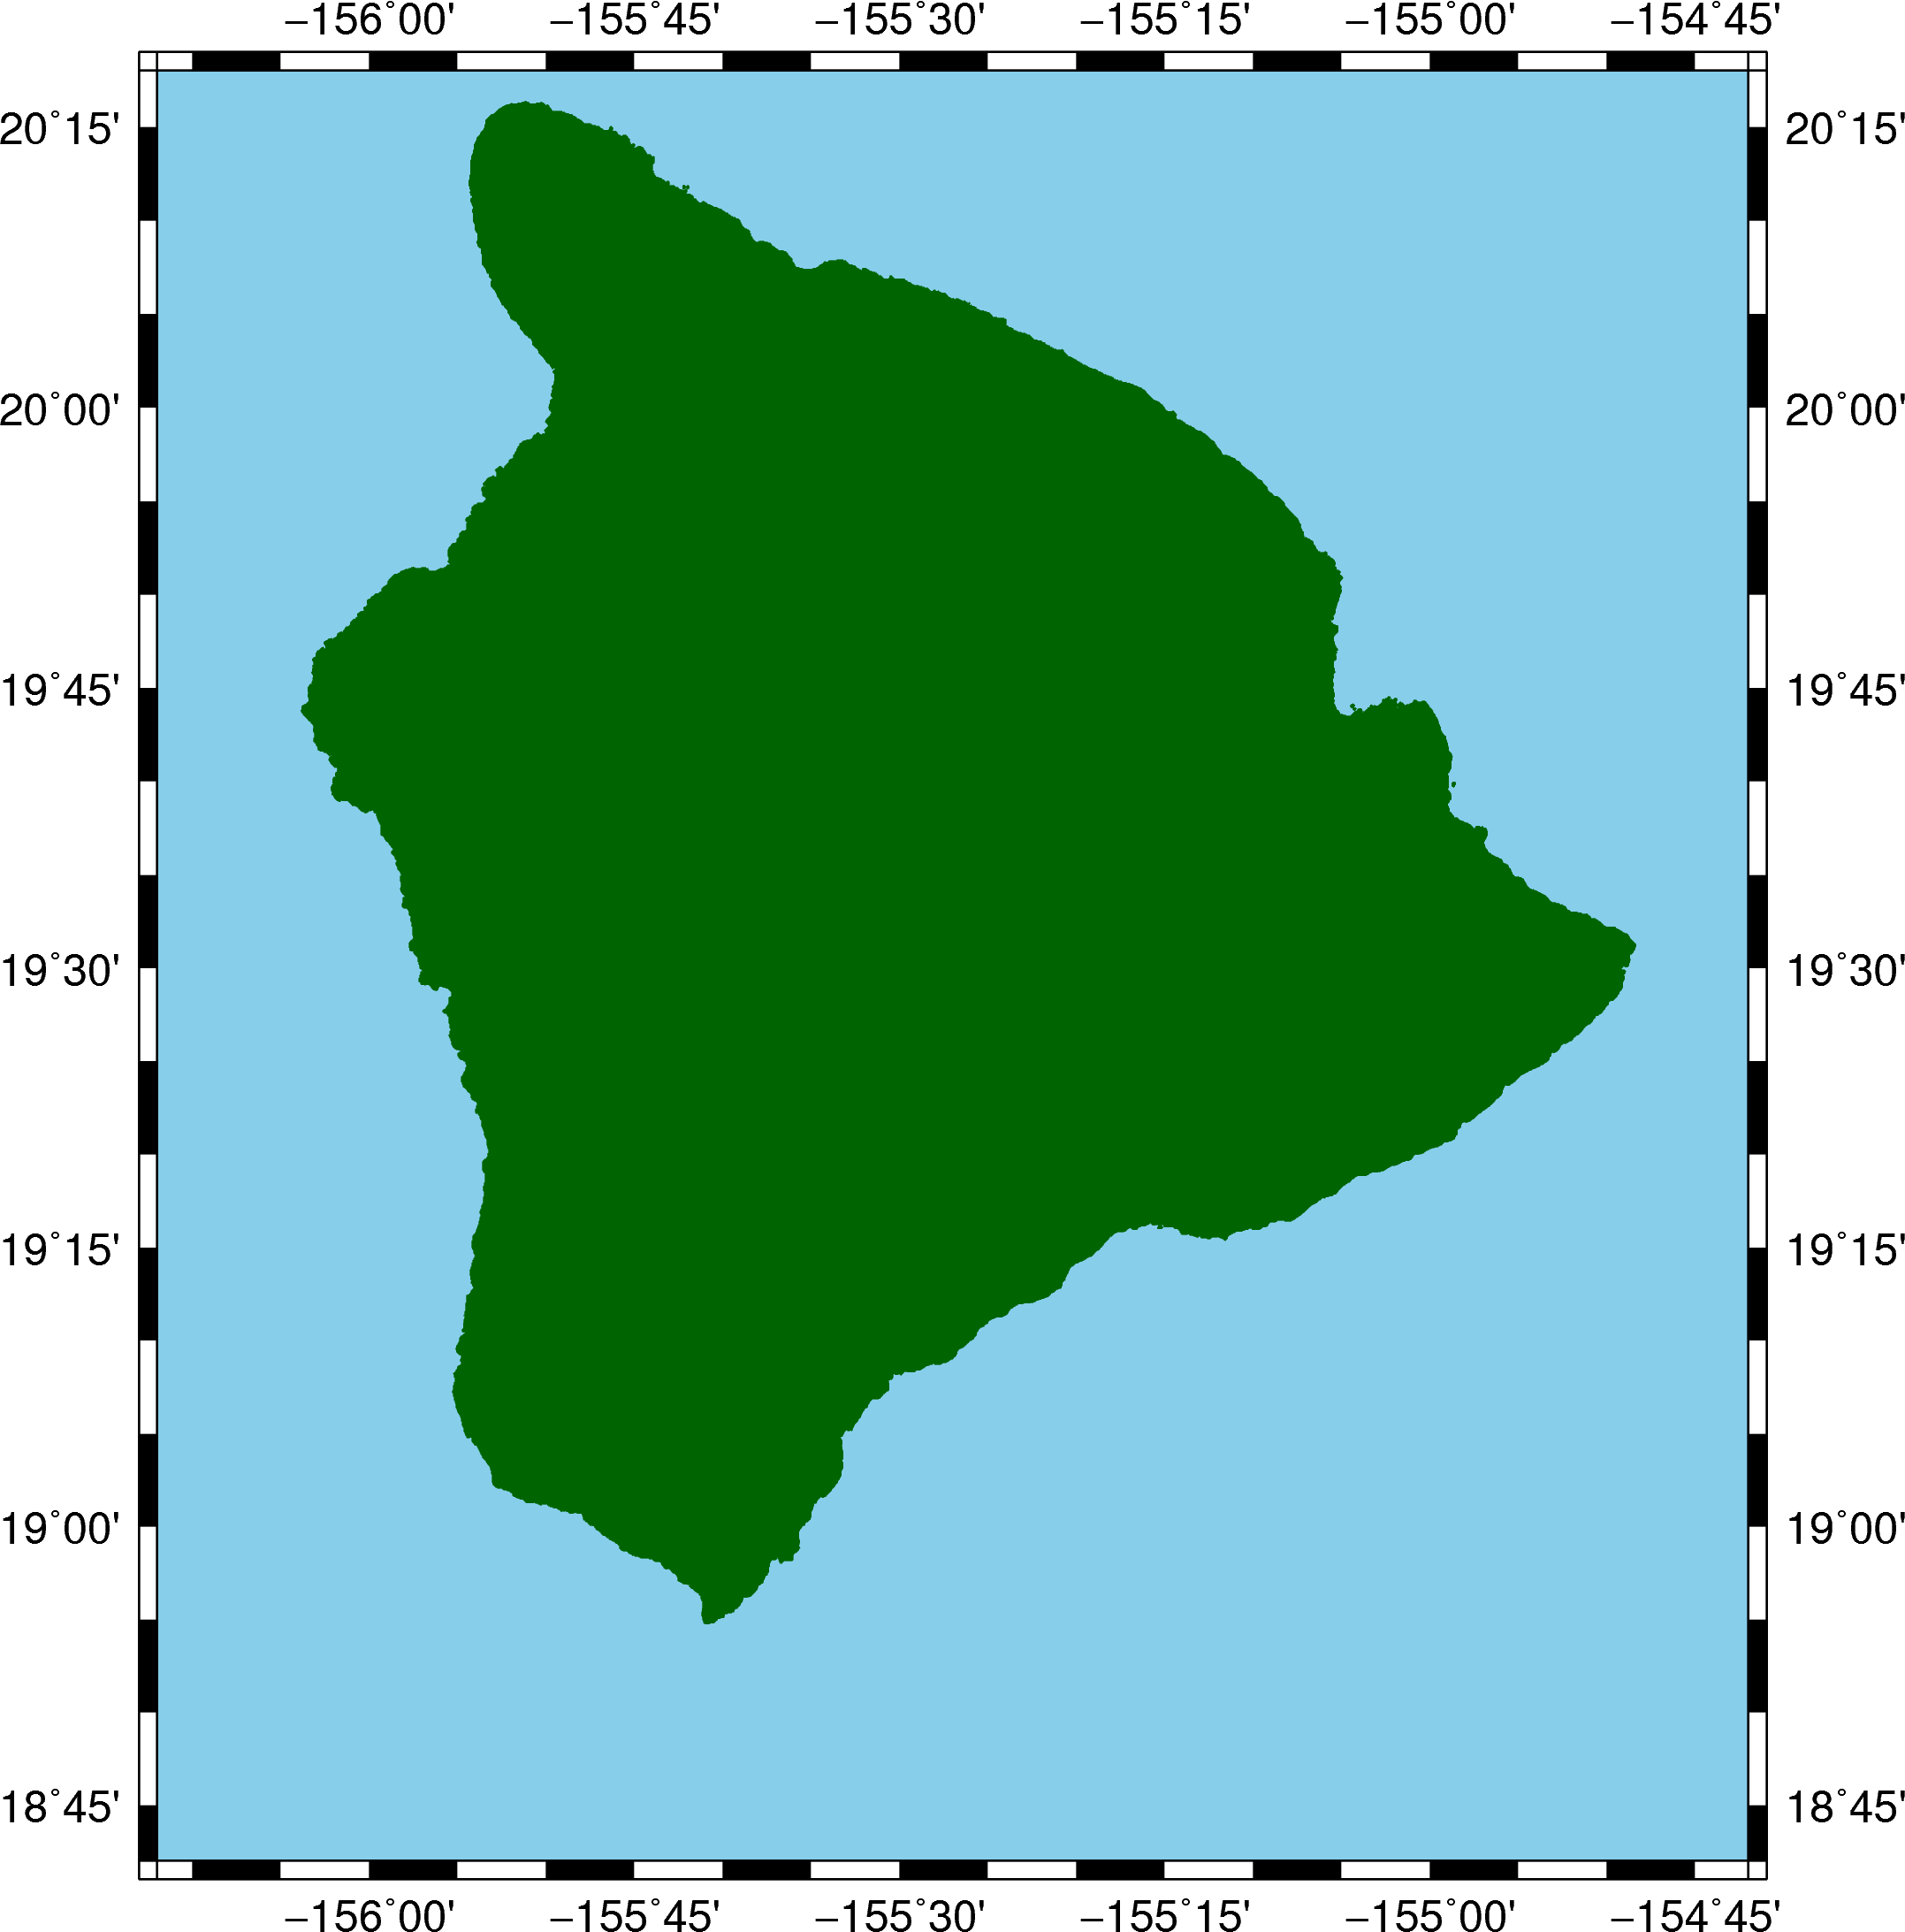

In [3]:
# Hawaii - Big Island 
# 18.417, 20.392] Latitude
# [-156.517, -154.215] Longitude

fig = gmt.Figure()
fig.coast(region=[-156.2, -154.7, 18.7, 20.3], projection='M6i', 
          land='darkgreen', water='skyblue', 
          frame=True)
fig.show()

In [4]:
# Load in the data
import pandas as pd
import numpy as np

# Read in only some of the parameters from USGS
col_keep = ['time','latitude','longitude','depth','mag','magType','place']
df = pd.read_csv('/home/nicole/python/gmt/hawaii_13May.csv', usecols=col_keep)
df.head(5)

,time,latitude,longitude,depth,mag,magType,place
0,2018-04-25T00:43:38.320Z,19.384667,-155.245000,1.37,2.96,ml,"5km S of Volcano, Hawaii"
1,2018-04-25T00:44:48.940Z,19.384500,-155.245500,1.45,2.79,ml,"5km S of Volcano, Hawaii"
2,2018-04-25T03:04:58.660Z,19.386167,-155.280167,1.69,2.62,ml,"6km SW of Volcano, Hawaii"
3,2018-04-25T06:49:36.040Z,19.390333,-155.281998,0.85,2.02,ml,"6km SW of Volcano, Hawaii"
4,2018-04-25T06:49:36.430Z,19.397833,-155.292160,-0.24,1.92,ml,"6km WSW of Volcano, Hawaii"


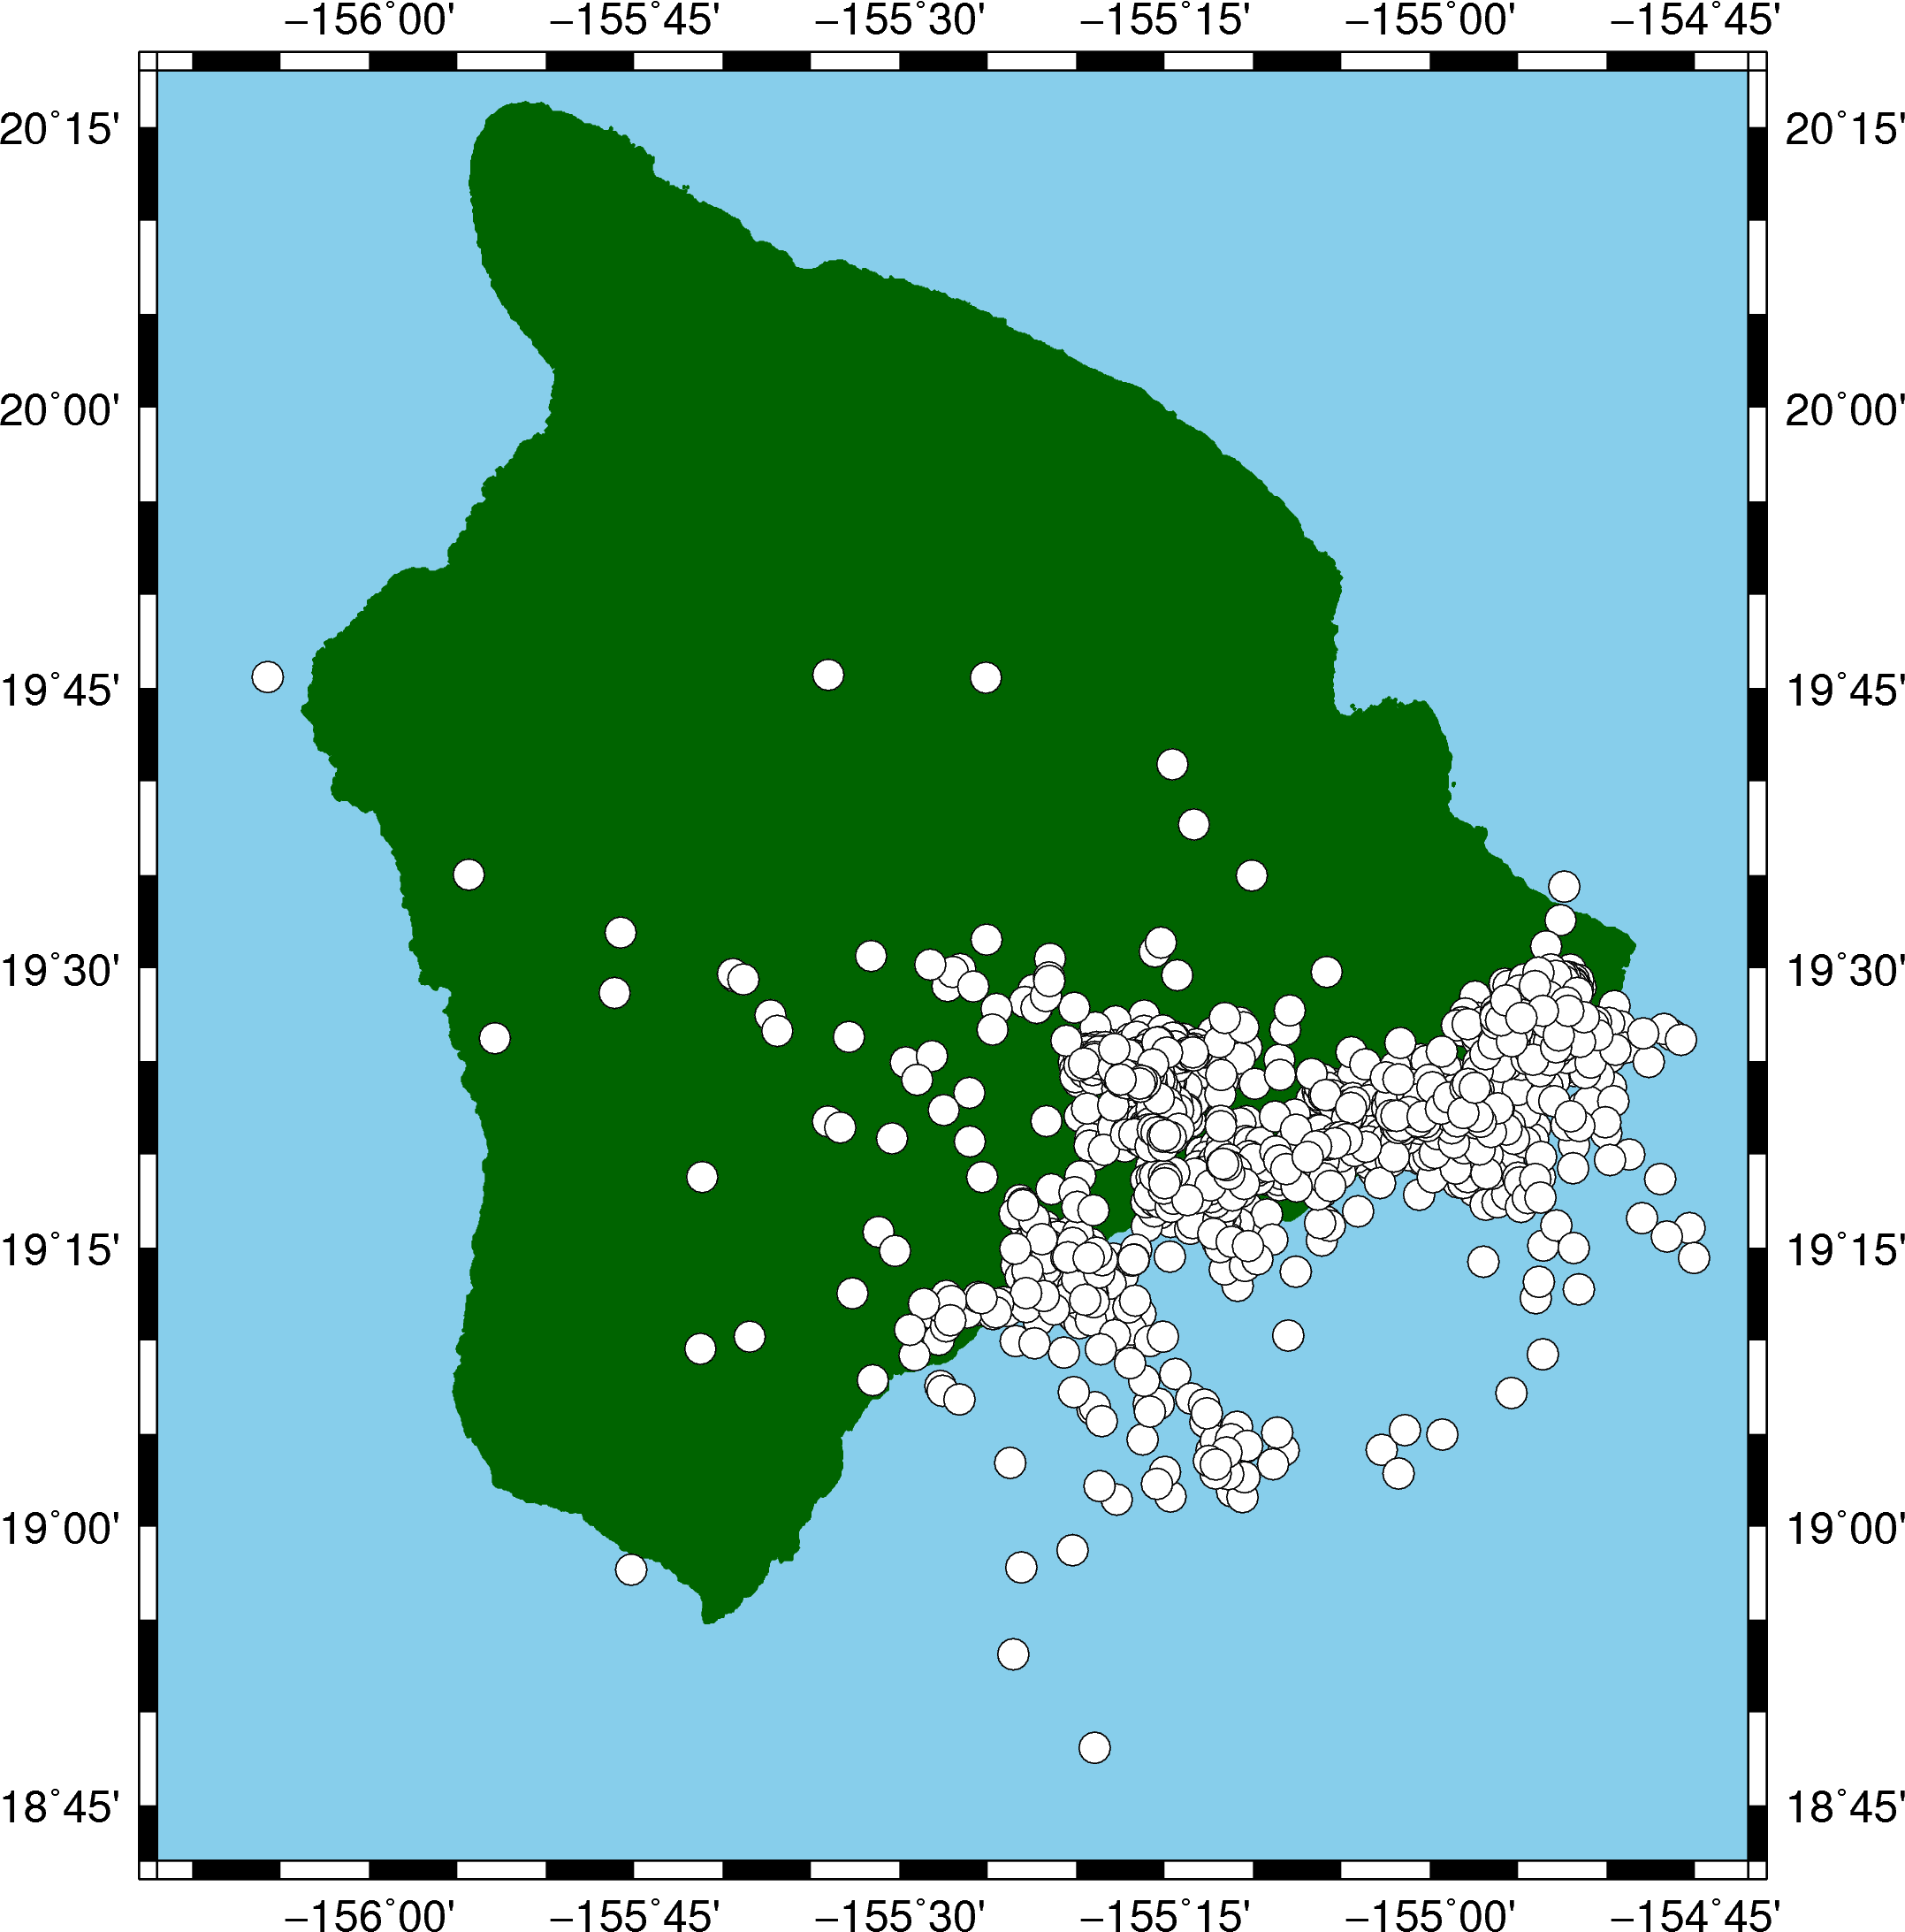

In [12]:
fig = gmt.Figure()
fig.coast(region=[-156.2, -154.7, 18.7, 20.3], projection='M6i', 
          land='darkgreen', water='skyblue', frame=True)
fig.plot(x=df.longitude, y=df.latitude,
         style='c0.3c', color='white', pen='black')
fig.show()

In [48]:
# Calculate some parameters for plotting sizes and colours
# Log magnitude scale (circle sizes)
magsize = 0.0215*(2**df.mag)


In [49]:
# Convert date to something more useful

# Import the datetime module
from datetime import datetime

# Create a datetime object column from the 
#string time column using strptime
df['dt_time'] = df['time'].apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))

# Add additional columns for day-of-year
df['dofy'] = df['dt_time'].apply(lambda x: x.strftime("%j"))
# Cast the dtype as int (currently an object)
df['dofy'] = df['dofy'].astype(str).astype(int)

# Add additional columns for year, month, and day
df['year'] = df['dt_time'].apply(lambda x: x.year)
df['month'] = df['dt_time'].apply(lambda x: x.month)
df['day'] = df['dt_time'].apply(lambda x: x.day)

In [50]:
df['hour'] = df['dt_time'].apply(lambda x: x.hour)
df['minute'] = df['dt_time'].apply(lambda x: x.minute)
df['second'] = df['dt_time'].apply(lambda x: x.second)

df['test_time'] = df.dofy + df.hour/24 + df.minute/(60*24) + df.second/(60*60*24)
#print(df.test_time)

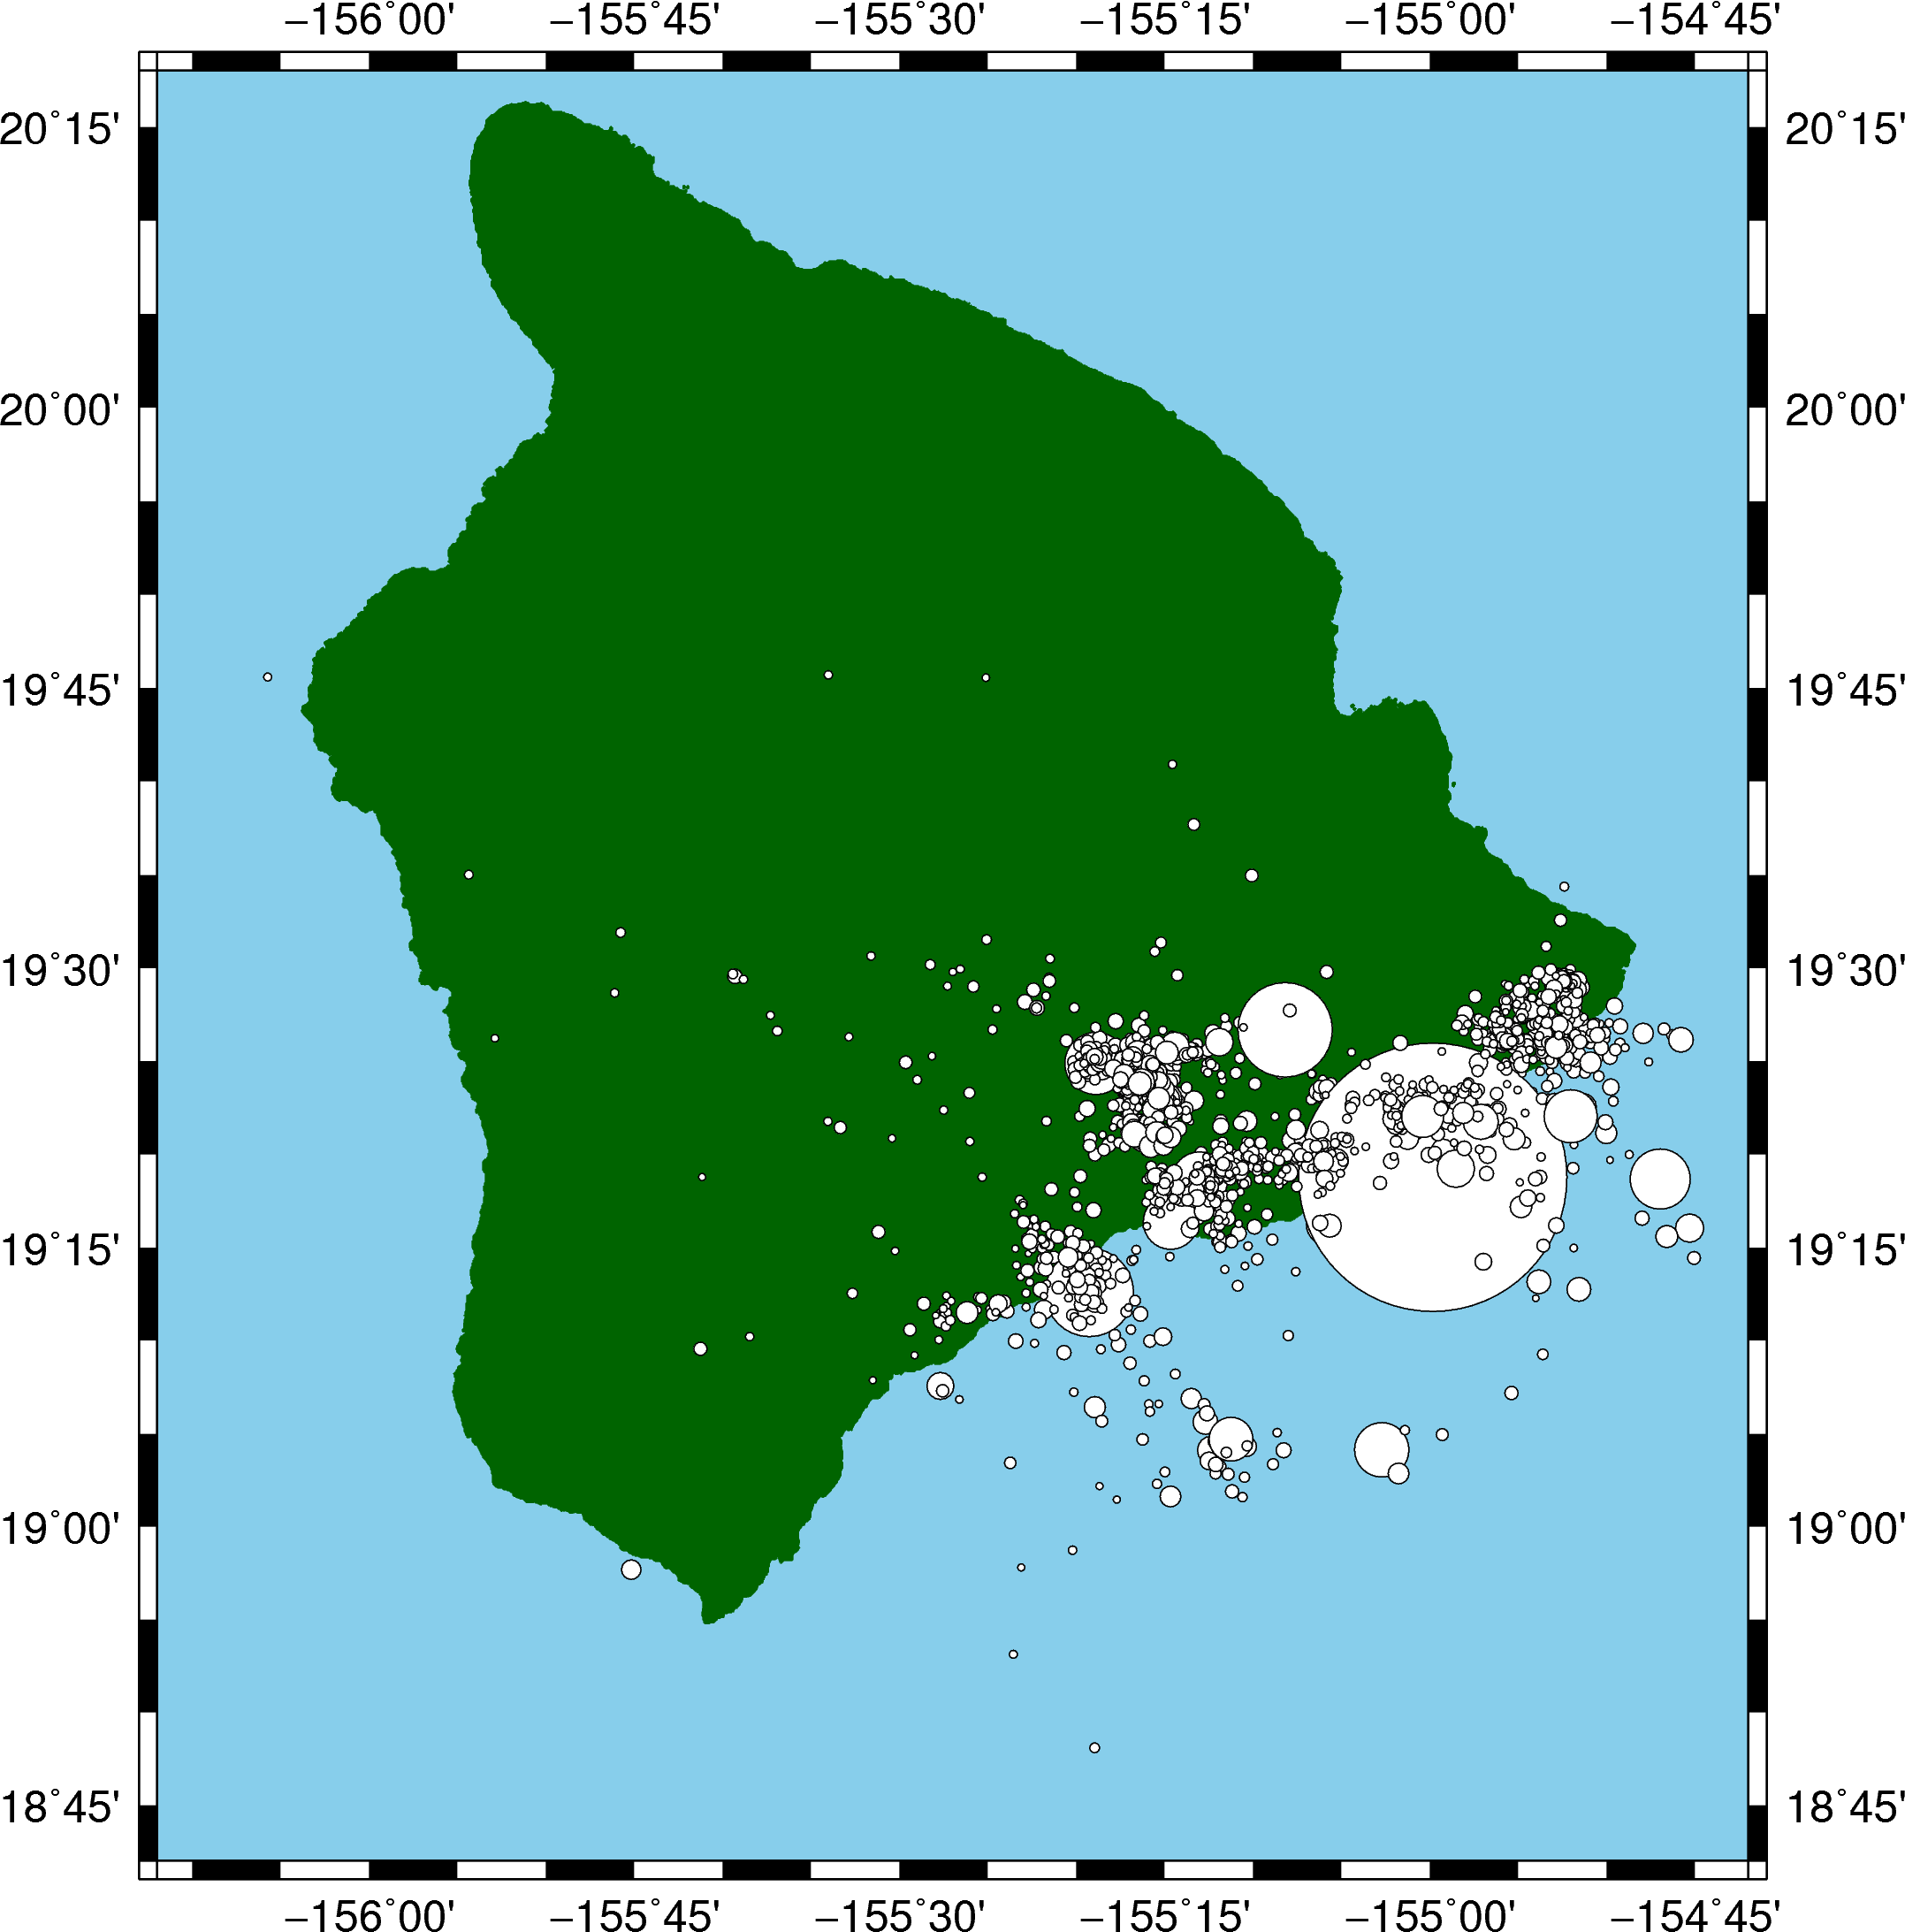

In [51]:
fig = gmt.Figure()
fig.coast(region=[-156.2, -154.7, 18.7, 20.3], projection='M6i', 
          land='darkgreen', water='skyblue', 
          frame=True)
fig.plot(x=df.longitude, y=df.latitude, sizes=magsize,
         color=df.test_time, cmap='viridis', style='cc', pen='black')
fig.show()

In [52]:
df.head()

,time,latitude,longitude,depth,mag,magType,place,dt_time,dofy,year,month,day,hour,minute,second,test_time
0,2018-04-25T00:43:38.320Z,19.384667,-155.245000,1.37,2.96,ml,"5km S of Volcano, Hawaii",2018-04-25 00:43:38.320,115,2018,4,25,0,43,38,115.030301
1,2018-04-25T00:44:48.940Z,19.384500,-155.245500,1.45,2.79,ml,"5km S of Volcano, Hawaii",2018-04-25 00:44:48.940,115,2018,4,25,0,44,48,115.031111
2,2018-04-25T03:04:58.660Z,19.386167,-155.280167,1.69,2.62,ml,"6km SW of Volcano, Hawaii",2018-04-25 03:04:58.660,115,2018,4,25,3,4,58,115.128449
3,2018-04-25T06:49:36.040Z,19.390333,-155.281998,0.85,2.02,ml,"6km SW of Volcano, Hawaii",2018-04-25 06:49:36.040,115,2018,4,25,6,49,36,115.284444
4,2018-04-25T06:49:36.430Z,19.397833,-155.292160,-0.24,1.92,ml,"6km WSW of Volcano, Hawaii",2018-04-25 06:49:36.430,115,2018,4,25,6,49,36,115.284444


In [53]:
# Group by day of year

df_oneday = df.loc[df['dofy'] == 128]
df_oneday_2 = df.loc[df['dofy'] == 127]
df_oneday_3 = df.loc[df['dofy'] == 126]


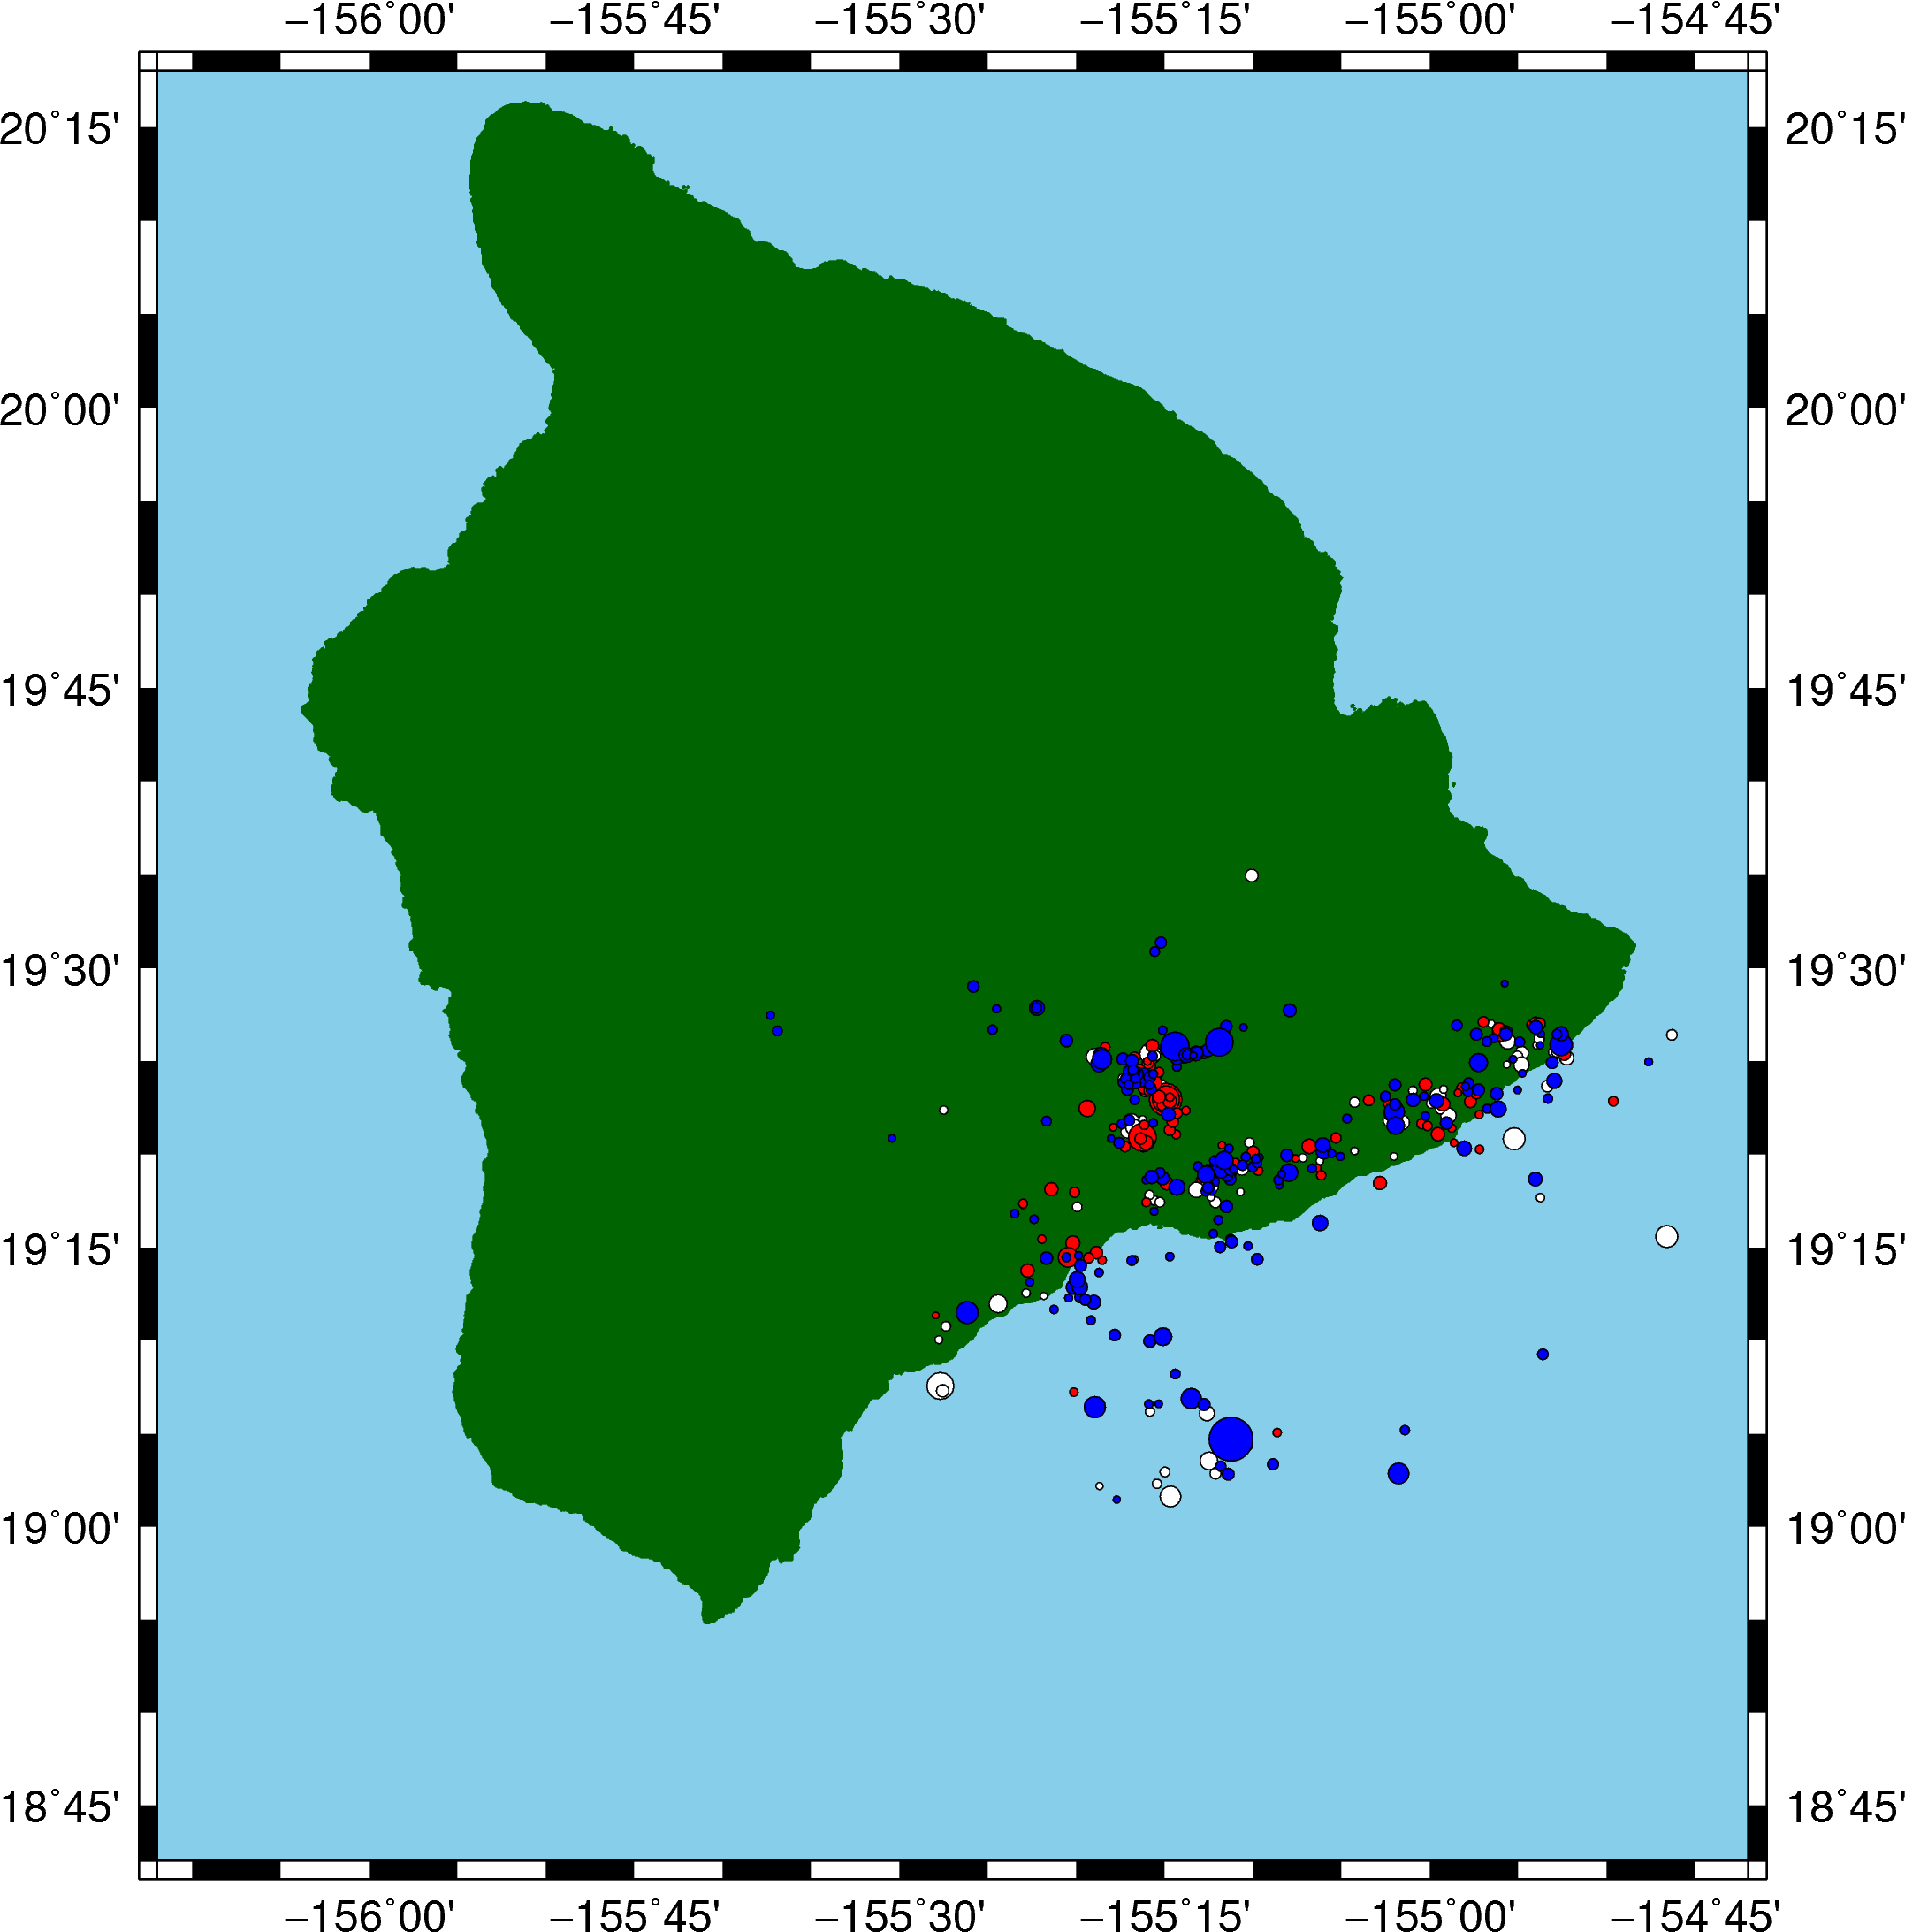

In [54]:
fig = gmt.Figure()
fig.coast(region=[-156.2, -154.7, 18.7, 20.3], projection='M6i', 
          land='darkgreen', water='skyblue', 
          frame=True)
fig.plot(x=df_oneday.longitude, y=df_oneday.latitude, sizes=0.0215*(2**df_oneday.mag),
         color='white', style='cc', pen='black')
fig.plot(x=df_oneday_2.longitude, y=df_oneday_2.latitude, sizes=0.0215*(2**df_oneday_2.mag),
         color='red', style='cc', pen='black')
fig.plot(x=df_oneday_3.longitude, y=df_oneday_3.latitude, sizes=0.0215*(2**df_oneday_3.mag),
         color='blue', style='cc', pen='black')

fig.show()

In [55]:
temp = df.dofy.max()
print(temp)
#range(df.dofy.min(), df.dofy.max()+1)
#print(plotdays)

start = df.dofy.min()
end = df.dofy.max()+1
range(start,end)

133


range(115, 134)

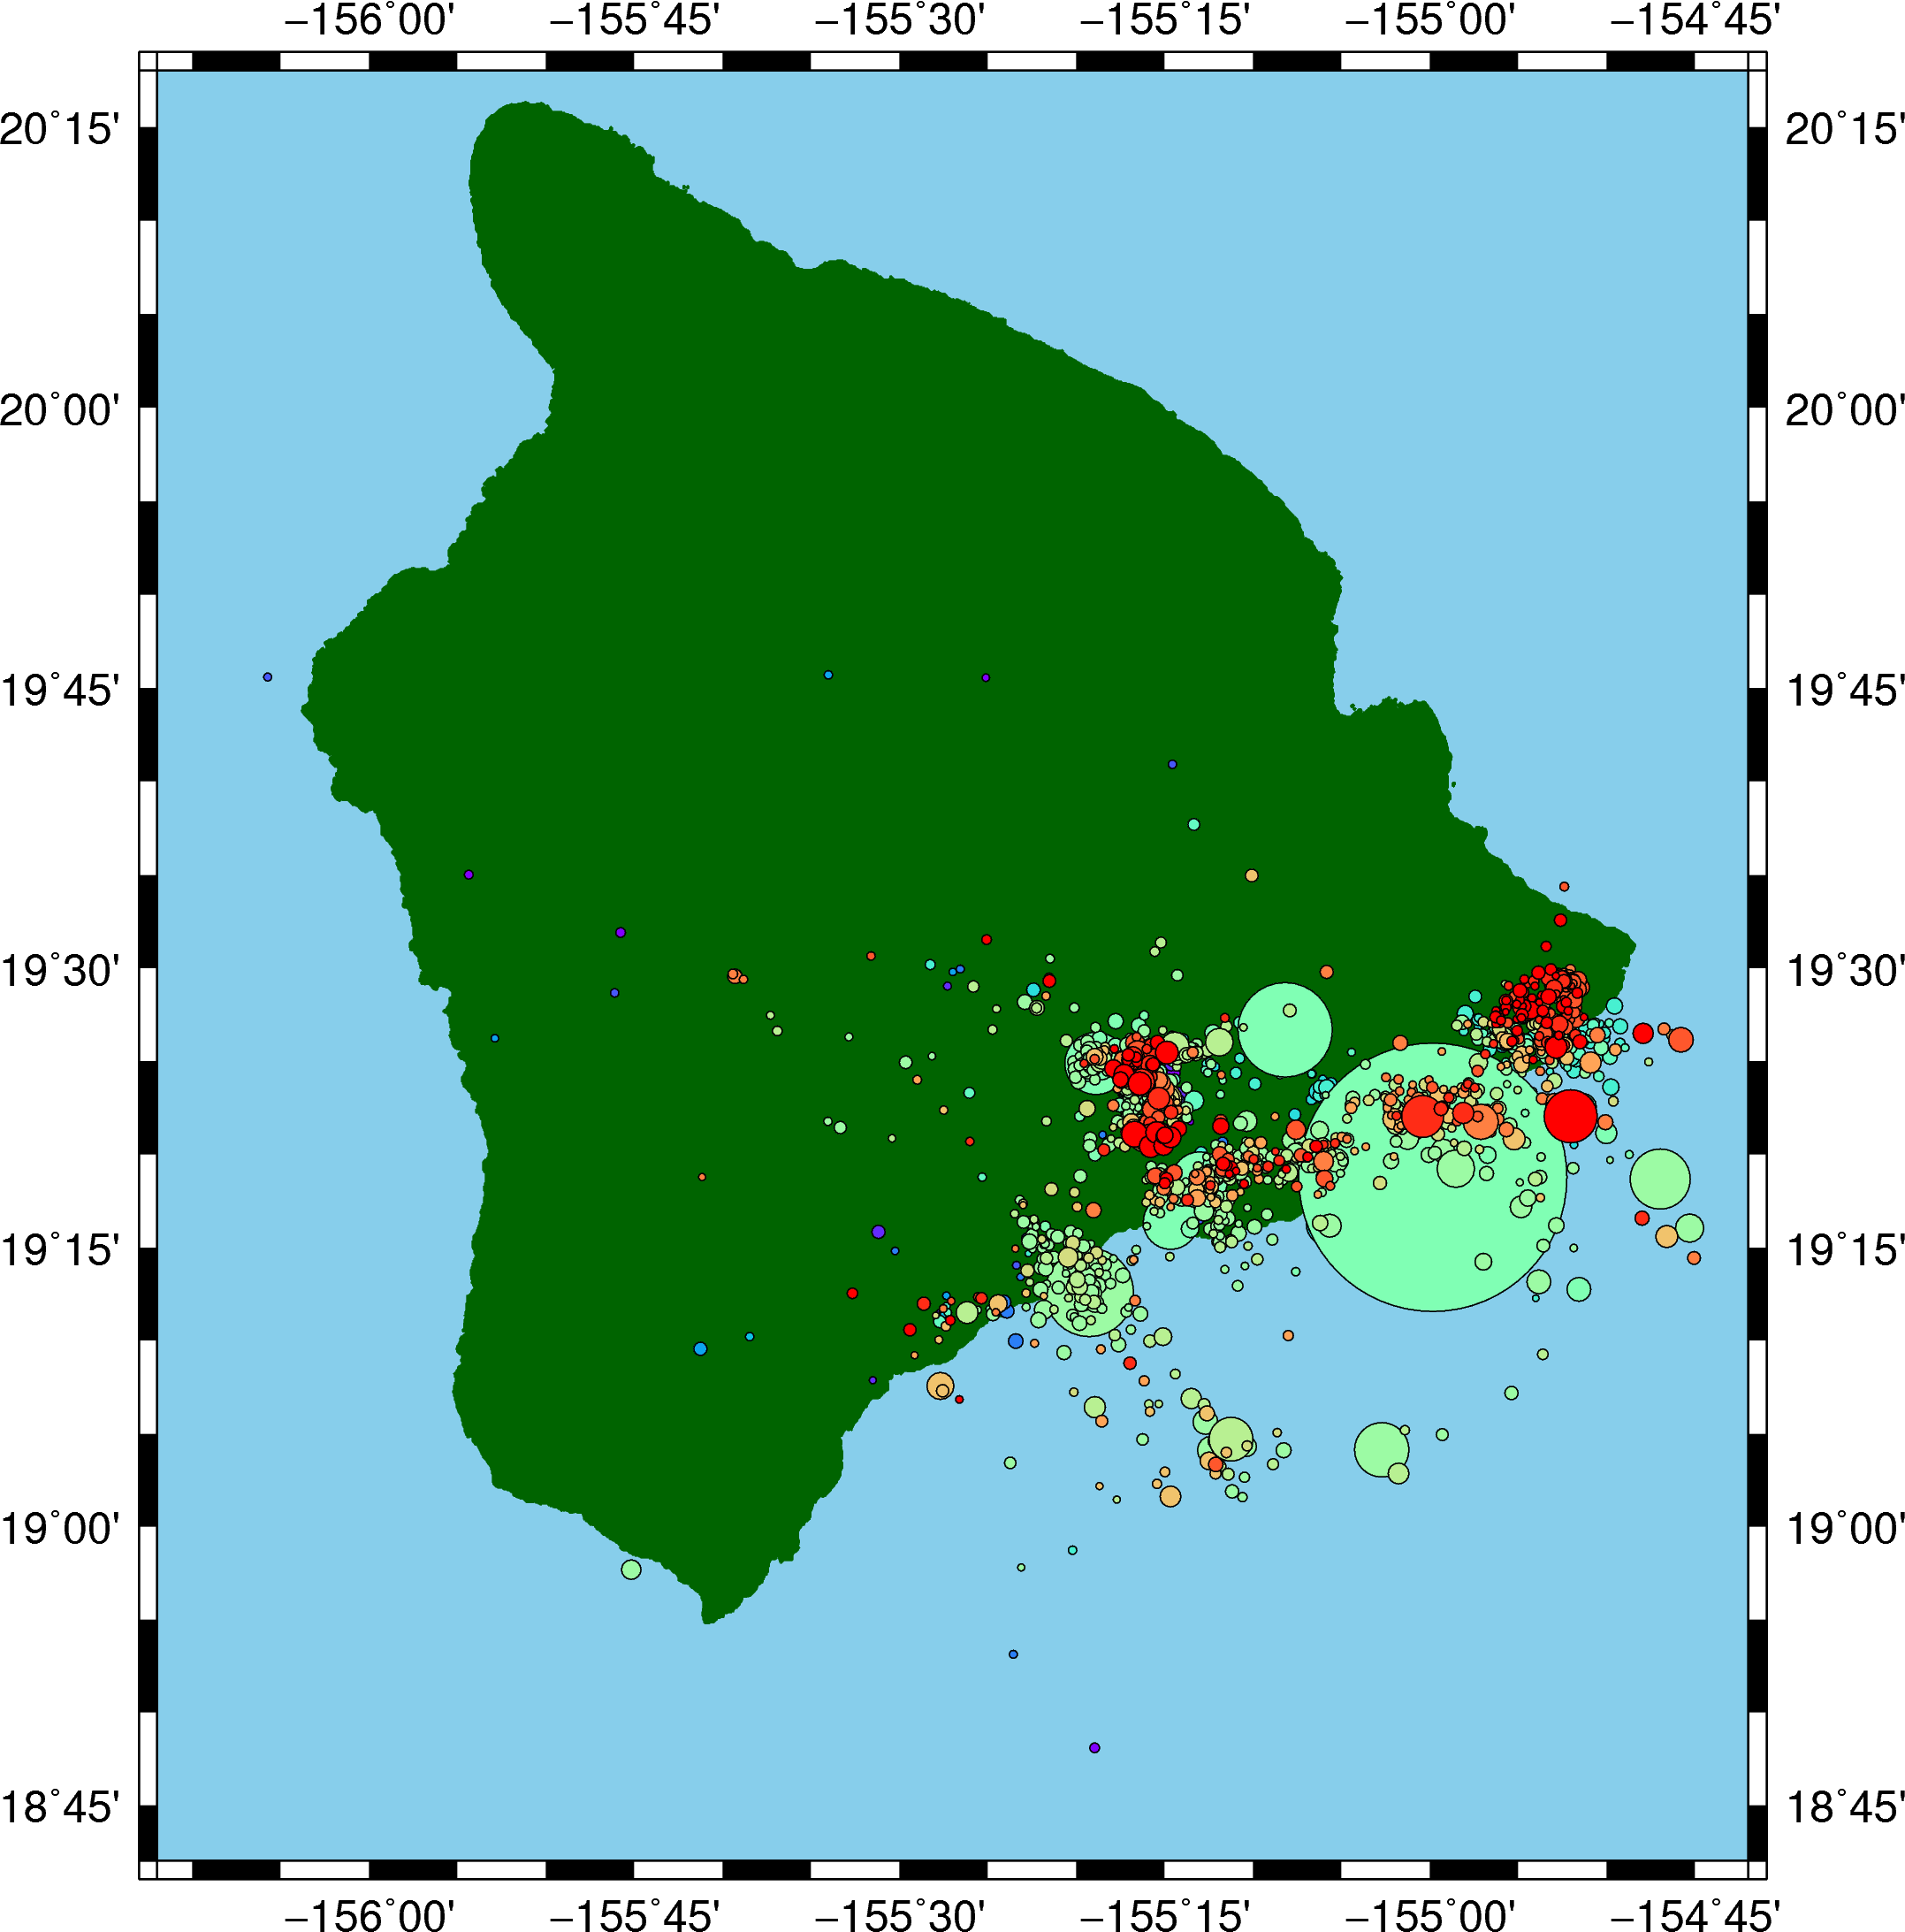

In [56]:
from matplotlib import cm

fig = gmt.Figure()
fig.coast(region=[-156.2, -154.7, 18.7, 20.3], projection='M6i', 
          land='darkgreen', water='skyblue', 
          frame=True)
# Create an array of days to plot
plotdays = range(df.dofy.min(), df.dofy.max()+1)

# Pick from a colormap 
from matplotlib.colors import rgb2hex
cmap = cm.get_cmap('rainbow', len(plotdays))

# Convert RGB colors to hex
mycolors = np.empty(0)
for j in range(cmap.N):
    rgb = cmap(j)[:3] # will return rgba, we take only first 3 so we get rgb
    mycolors = np.append(mycolors, [rgb2hex(rgb)])

# Plot earthquakes for each day
i=0
for day in plotdays:
    df_day = df.loc[df['dofy'] == day]
    fig.plot(x=df_day.longitude, y=df_day.latitude, sizes=0.0215*(2**df_day.mag),
         color=mycolors[i], style='cc', pen='black',title='Day')
    
    i+=1


fig.show()

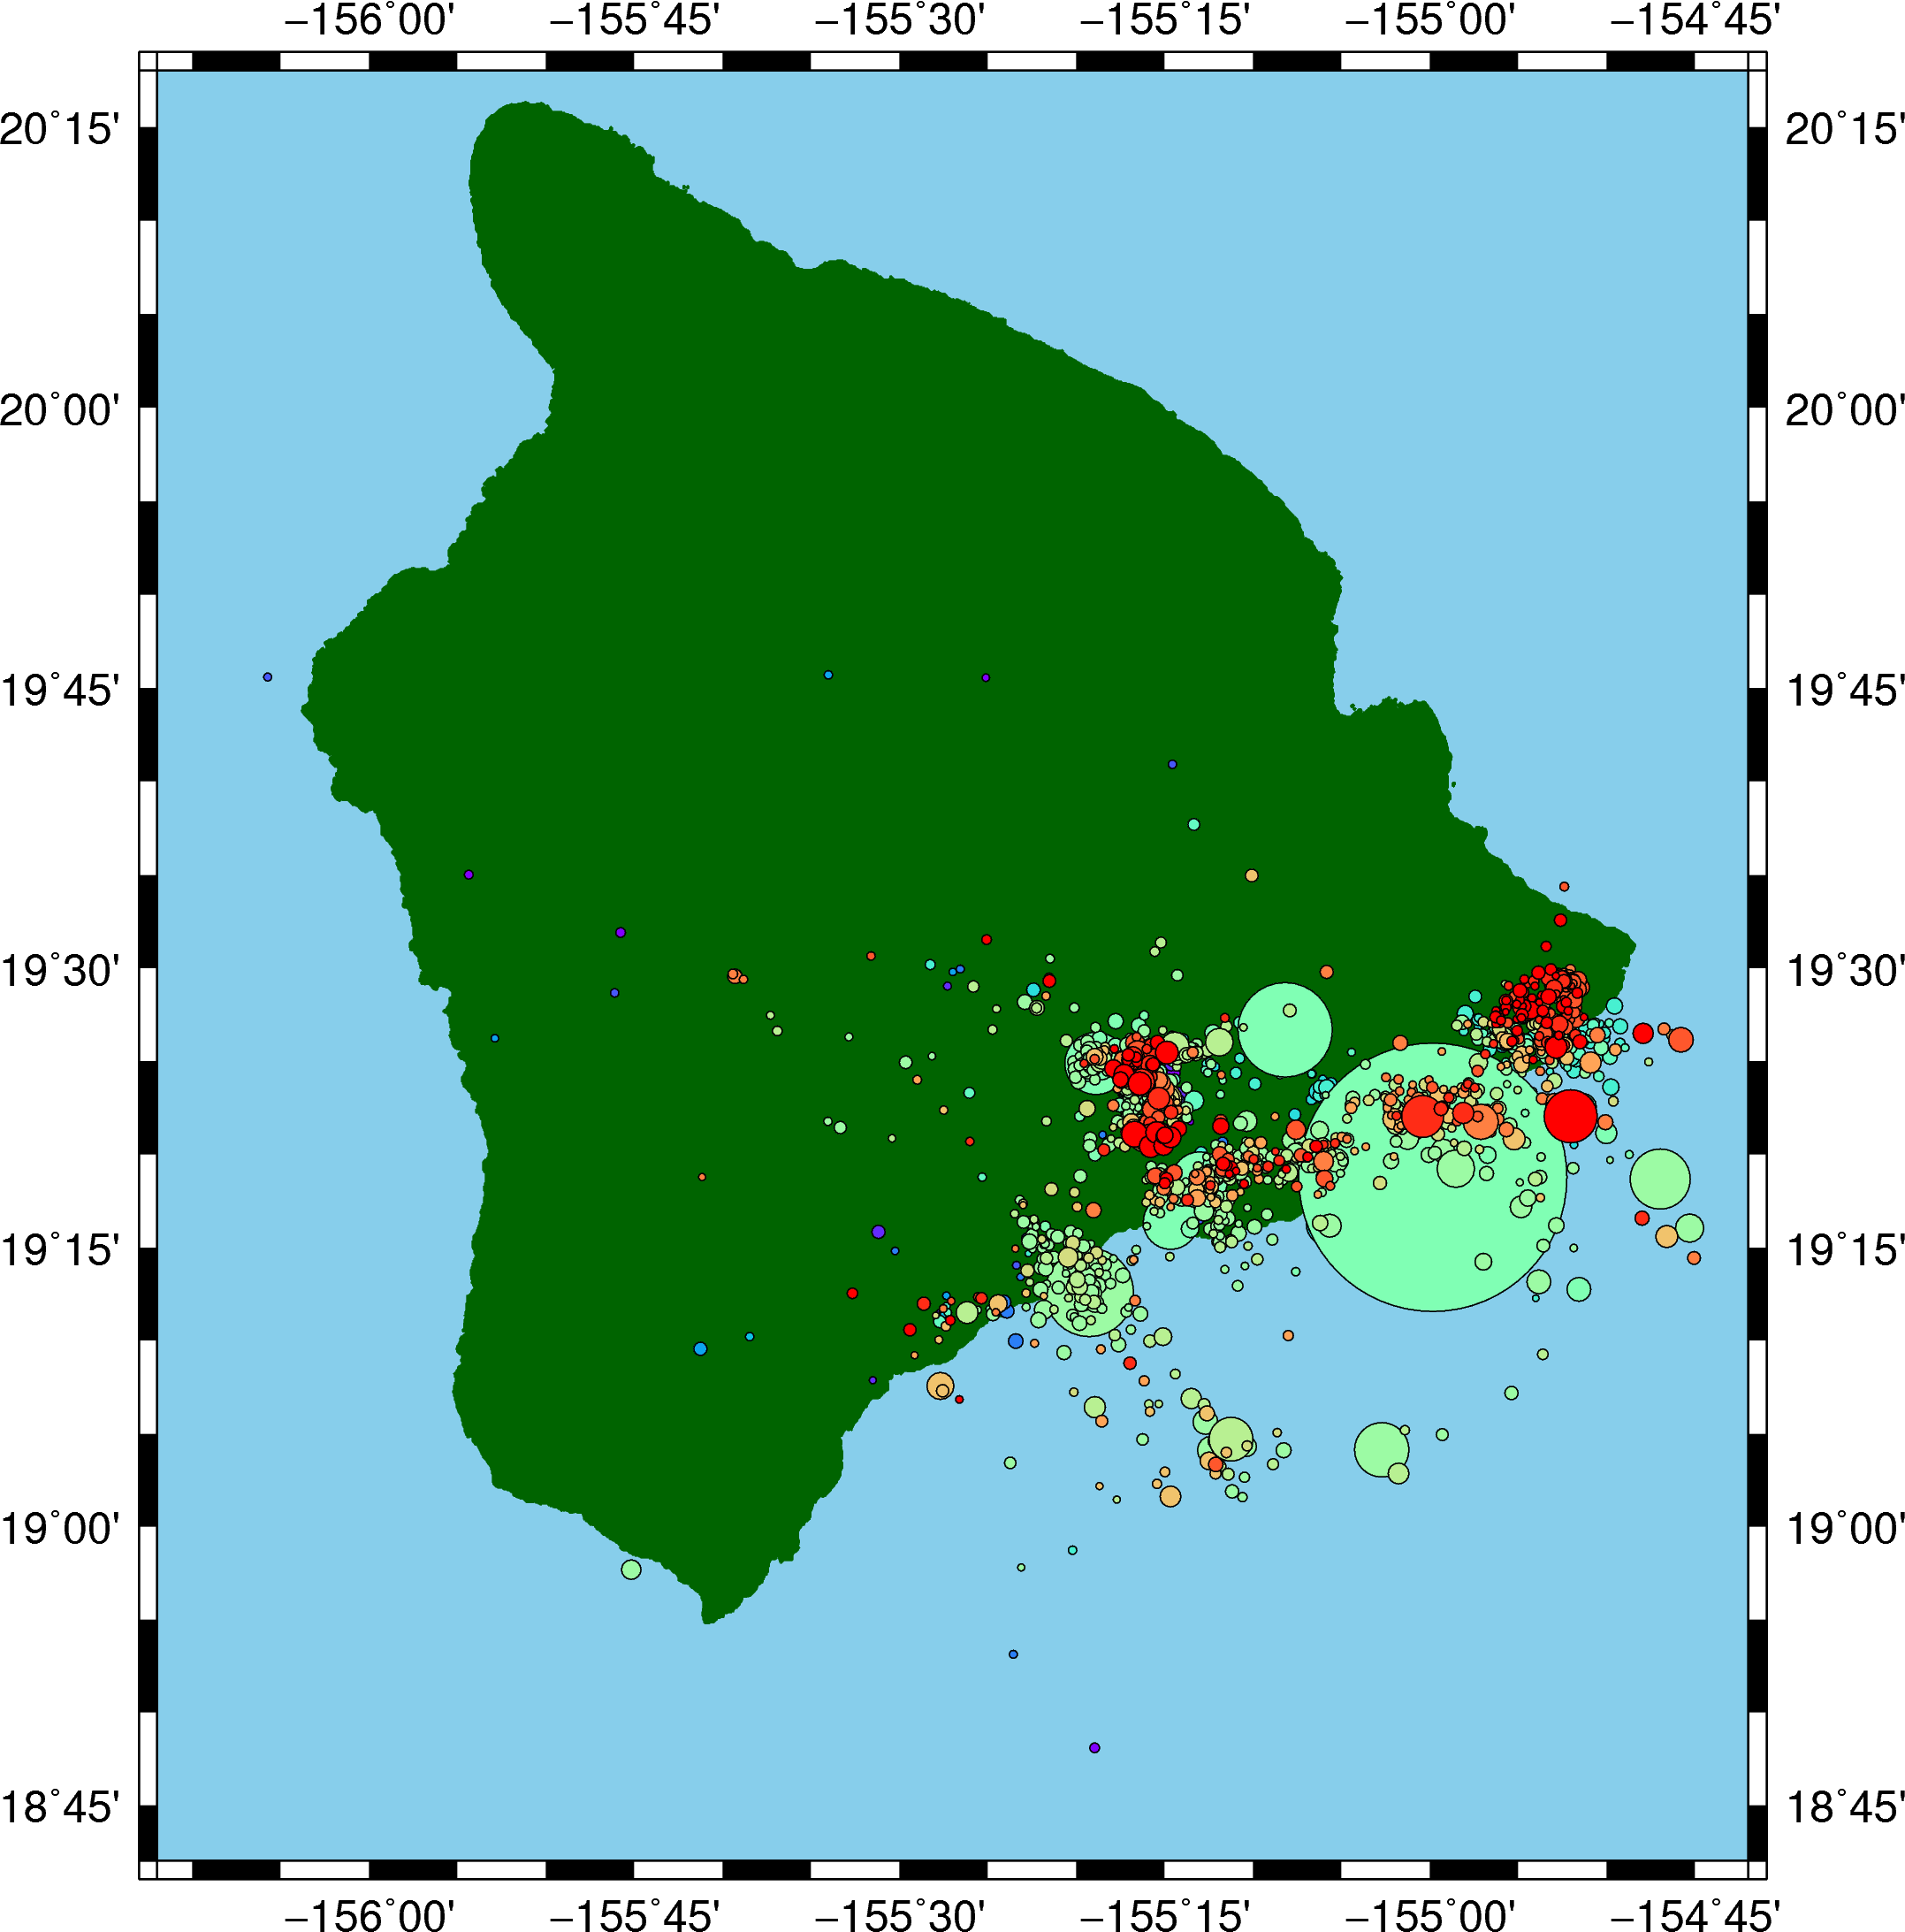

In [60]:
fig = gmt.Figure()
fig.coast(region=[-156.2, -154.7, 18.7, 20.3], projection='M6i', 
          land='darkgreen', water='skyblue', 
          frame=True)
# Create an array of days to plot
plotdays = range(df.dofy.min(), df.dofy.max()+1)

# Pick from a colormap 
from matplotlib.colors import rgb2hex
cmap = cm.get_cmap('rainbow', len(plotdays))

# Convert RGB colors to hex
mycolors = np.empty(0)
for j in range(cmap.N):
    rgb = cmap(j)[:3] # will return rgba, we take only first 3 so we get rgb
    mycolors = np.append(mycolors, [rgb2hex(rgb)])

path = '/home/nicole/python/gmt/movies/10May'

# Plot earthquakes for each day
i=0
for day in plotdays:
    df_day = df.loc[df['dofy'] == day]
    fig.plot(x=df_day.longitude, y=df_day.latitude, sizes=0.0215*(2**df_day.mag),
         color=mycolors[i], style='cc', pen='black')
    file = 'image'+ str(i) +'.png'
    #fig.savefig(path+file)
    i+=1
    

fig.show()

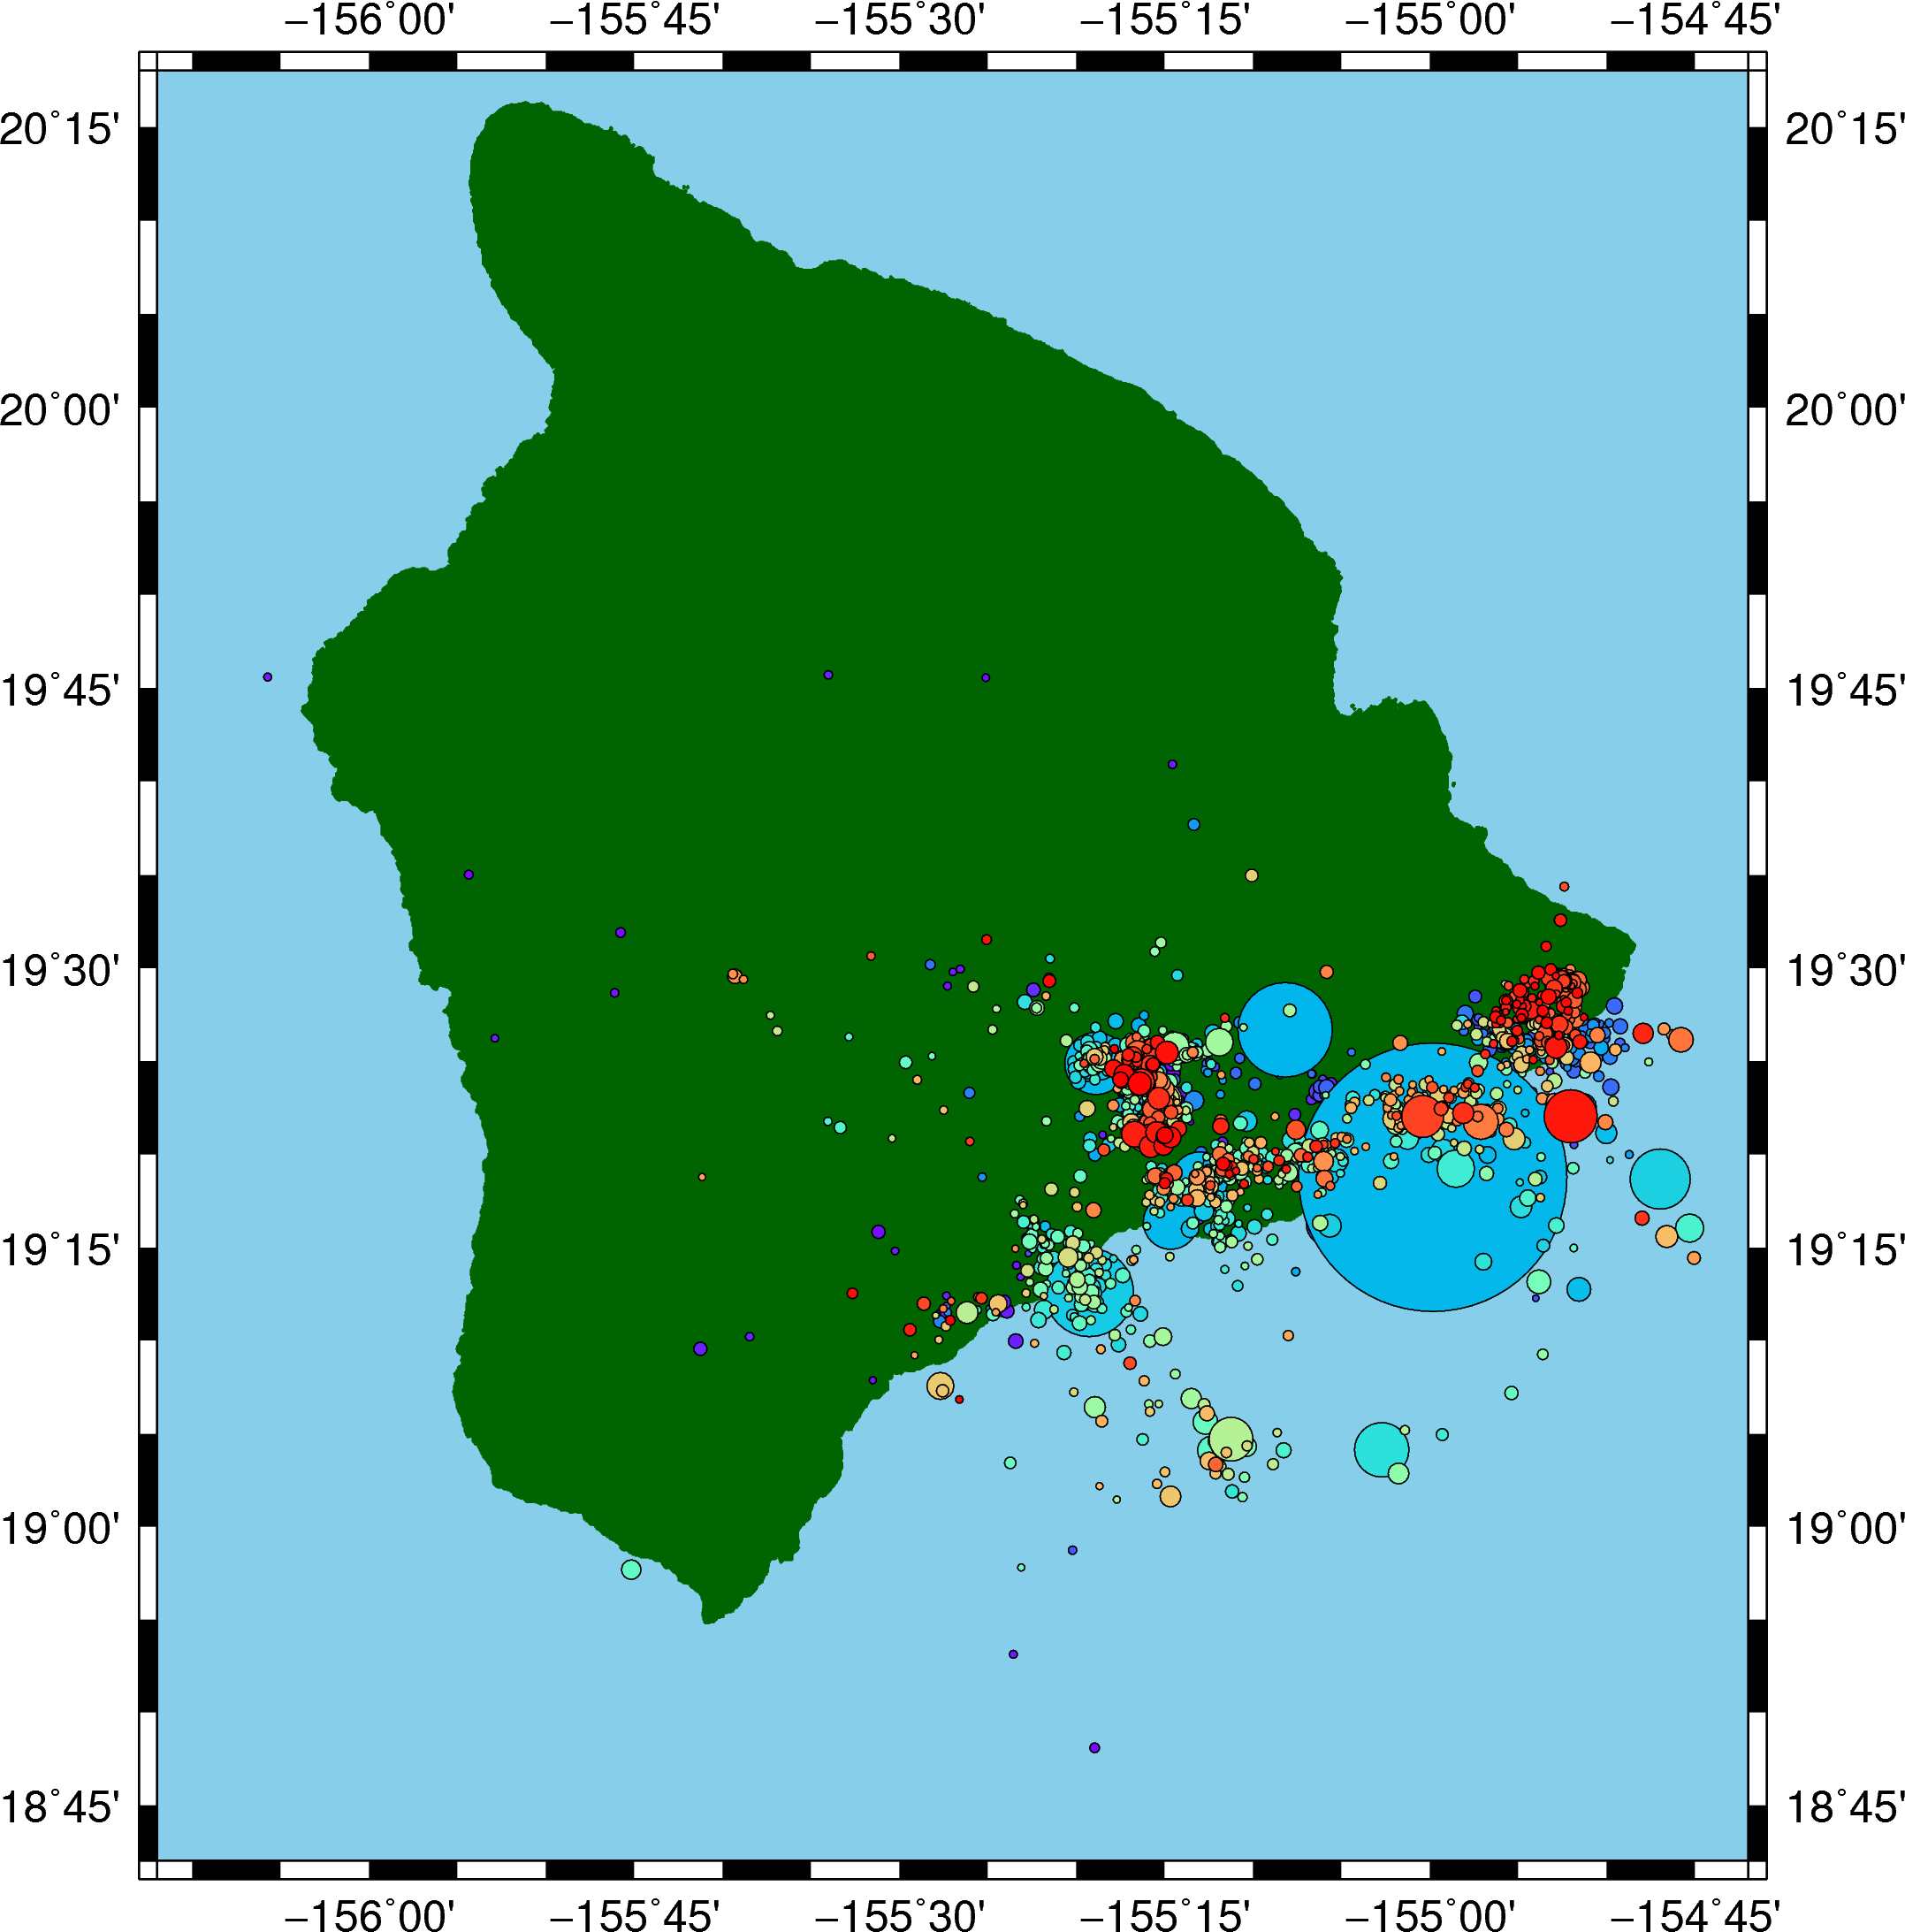

In [63]:
fig = gmt.Figure()
fig.coast(region=[-156.2, -154.7, 18.7, 20.3], projection='M6i', 
          land='darkgreen', water='skyblue', 
          frame=True)

# Pick from a colormap 
from matplotlib.colors import rgb2hex
cmap = cm.get_cmap('rainbow', len(df.index))

# Convert RGB colors to hex
mycolors = np.empty(0)
for j in range(cmap.N):
    rgb = cmap(j)[:3] # will return rgba, we take only first 3 so we get rgb
    mycolors = np.append(mycolors, [rgb2hex(rgb)])

path = '/home/nicole/python/gmt/movies/13May/'
# Plot earthquakes for each day
for i in df.index:
        long = df.longitude[i:i+1]
        lat = df.latitude[i:i+1]
        ev_mag = 0.0215*(2**df.mag[i:i+1])
        fig.plot(x=long, y=lat, sizes=ev_mag, color=mycolors[i], style='cc', pen='black')
        file = 'image'+ str(i) +'.png'
        fig.savefig(path+file)
        
fig.show()